**Installing Transformers**

In [1]:
!pip install transformers

**Installing datasets**

In [2]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.5 MB/s eta 0:00:00


In [3]:
# !pip install numpy==1.23.4

**Importing Libraries**

In [4]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Mounting Google Drive**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing and reading data and storing the DataFrame into variable 'df'**

In [6]:
df = pd.read_csv('/content/drive/MyDrive/labeled_data.csv')

In [7]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [8]:
df.shape

(24783, 7)

### Here in this problem, we are interested only in two columns, namely [class] and [tweet]. So removing all other unnecessary columns:

In [9]:
df = df[['class','tweet']]
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


### As this project is all about demonstration of the implementaion of fine tuning of pre-trained BERT model and it require multiple epochs to train, and every epochs will take larger amount of time to complete, so here i am going to consider only 3000 data instances to train this model, so that the training time will not take much longer.

In [10]:
df = df[0:3001]
df.shape


(3001, 2)

In [11]:
df.head

<bound method NDFrame.head of       class                                              tweet
0         2  !!! RT @mayasolovely: As a woman you shouldn't...
1         1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2         1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3         1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4         1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...     ...                                                ...
2996      1  @Dedicated_03 that ugly ass picture and thanks...
2997      1  @DeeHarris__ she might be the one DONT be a bitch
2998      1  @DeeJay138 @FuckWatYuhHerrd I couldn't care LE...
2999      1  @DeeMayweather the fck? dem bitches always got...
3000      1         @DeeRay_FRESH - pussy &amp; purp.&#128514;

[3001 rows x 2 columns]>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   3001 non-null   int64 
 1   tweet   3001 non-null   object
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


Checking for number of classes and their distributions in our dataset

In [13]:
df['class'].value_counts()

1    2341
2     487
0     173
Name: class, dtype: int64

In [14]:
df['class'].value_counts(normalize = True) * 100

1    78.007331
2    16.227924
0     5.764745
Name: class, dtype: float64

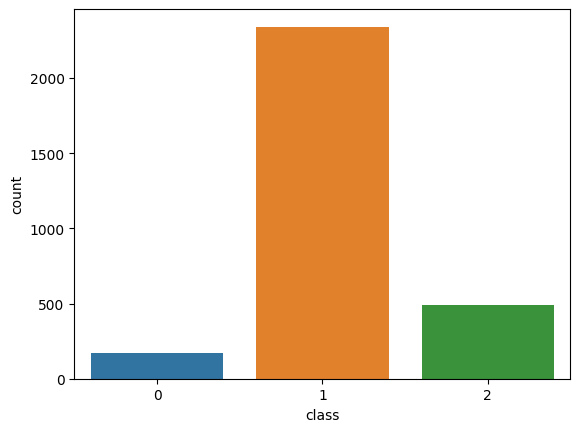

In [15]:
sns.countplot(x = 'class', data = df);

**Data Cleaning**

### We do not require much cleaning of data while working on BERT as it automatically takes care of these [stopwords, HTML syntax  etc]. It utilises them for their training and decision making.
### However, i will use regular experission for removing special characters.

In [16]:
df['clean_tweet'] = df['tweet'].str.replace('@[A-Za-z0-9]+\s?', '', regex = True)

In [17]:
df.head()

,class,tweet,clean_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! RT : As a woman you shouldn't complain abo...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! RT : boy dats cold...tyga dwn bad for cu...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitch...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! RT _G_Anderson: _based she look like...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! RT : The shit you hear about me ...


**Importing Pandas Dataset**

In [18]:
from datasets import Dataset

In [19]:
ds = Dataset.from_pandas(df)
ds

Dataset({
    features: ['class', 'tweet', 'clean_tweet'],
    num_rows: 3001
})

**Splitting Data into train set, validation set, and test set**

In [20]:
from datasets import DatasetDict

train_test_valid = ds.train_test_split()
test_valid = train_test_valid['test'].train_test_split()

train_test_valid_dataset = DatasetDict({
    'train' : train_test_valid['train'],
    'test' : test_valid['test'],
    'valid' : test_valid['train']
})

In [21]:
dataset = train_test_valid_dataset
dataset

DatasetDict({
    train: Dataset({
        features: ['class', 'tweet', 'clean_tweet'],
        num_rows: 2250
    })
    test: Dataset({
        features: ['class', 'tweet', 'clean_tweet'],
        num_rows: 188
    })
    valid: Dataset({
        features: ['class', 'tweet', 'clean_tweet'],
        num_rows: 563
    })
})

**Creating object for BERT Tokenizer**

In [22]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

**Tokenizing the texts from cleaned Tweets**

In [23]:
def token_fun(x):
  return tokenizer(x['clean_tweet'], padding = 'max_length', truncation = True)

tokenized_dataset = dataset.map(token_fun, batched = True)

tokenized_dataset

Map:   0%|          | 0/2250 [00:00<?, ? examples/s]

Map:   0%|          | 0/188 [00:00<?, ? examples/s]

Map:   0%|          | 0/563 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['class', 'tweet', 'clean_tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2250
    })
    test: Dataset({
        features: ['class', 'tweet', 'clean_tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 188
    })
    valid: Dataset({
        features: ['class', 'tweet', 'clean_tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 563
    })
})

From the above Tokenized dataset, extracting Tokenized Training Dataset, Tokenized Testing Dataset, Tokenized Validation Dataset

In [24]:
train_dataset = tokenized_dataset['train']

eval_dataset = tokenized_dataset['valid']

test_dataset = tokenized_dataset['test']

In [25]:
train_dataset

Dataset({
    features: ['class', 'tweet', 'clean_tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 2250
})

Here after the Tokenization, tweet and clean_tweet varibles are no more required, so removing these columns from the data

In [26]:
train_set = train_dataset.remove_columns(['tweet', 'clean_tweet']).with_format('tensorflow')

tf_eval_dataset = eval_dataset.remove_columns(['tweet', 'clean_tweet']).with_format('tensorflow')

tf_test_dataset = test_dataset.remove_columns(['tweet', 'clean_tweet']).with_format('tensorflow')

In [27]:
train_features = { x: train_set[x] for x in tokenizer.model_input_names}
train_set_for_final_model = tf.data.Dataset.from_tensor_slices((train_features, train_set['class'] ))
train_set_for_final_model = train_set_for_final_model.shuffle(len(train_set)).batch(8)


eval_features = {x: tf_eval_dataset[x] for x in tokenizer.model_input_names}
val_set_for_final_model = tf.data.Dataset.from_tensor_slices((eval_features, tf_eval_dataset["class"]))
val_set_for_final_model = val_set_for_final_model.batch(8)

test_features = {x: tf_test_dataset[x] for x in tokenizer.model_input_names}
test_set_for_final_model = tf.data.Dataset.from_tensor_slices((test_features, tf_test_dataset["class"]))
test_set_for_final_model =test_set_for_final_model.batch(8)

**Defining The Model**

With this line of code, the model would be pooled in to our local machine from huggingface repository

In [28]:
model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=3)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Model Compilation**

In [29]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy(),
)

**Training the Model**

In [30]:
history = model.fit(train_set_for_final_model, validation_data=val_set_for_final_model, epochs=2 )


Epoch 1/2
282/282 [==============================] - 329s 1s/step - loss: 0.4050 - sparse_categorical_accuracy: 0.8631 - val_loss: 0.3756 - val_sparse_categorical_accuracy: 0.8952
Epoch 2/2
282/282 [==============================] - 280s 992ms/step - loss: 0.2785 - sparse_categorical_accuracy: 0.9058 - val_loss: 0.3790 - val_sparse_categorical_accuracy: 0.8472


**Plotting Training and Validation Accuracy**

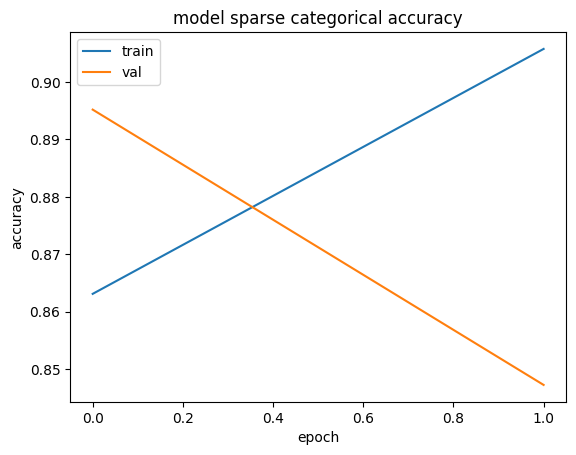

In [31]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model sparse categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


**Plotting the Training_Loss and Validation_Loss**

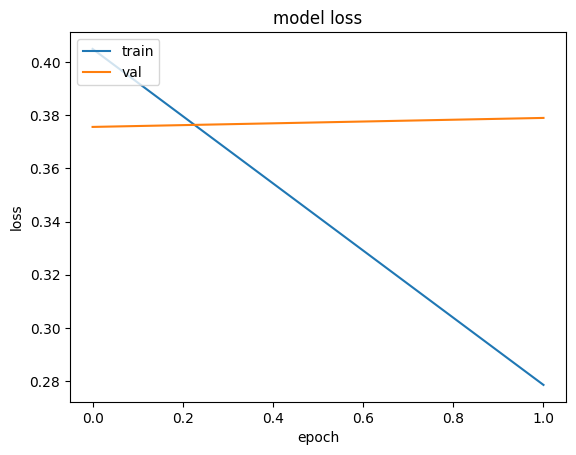

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Testing the Model with Test Dataset**

In [33]:
test_loss, test_acc = model.evaluate(test_set_for_final_model,verbose=2)
print('\nTest accuracy:', test_acc)

24/24 - 8s - loss: 0.3506 - sparse_categorical_accuracy: 0.8511 - 8s/epoch - 325ms/step

Test accuracy: 0.8510638475418091


**Checking the Performance of the Model**

In [44]:
predict_score_and_class_dict = {0: 'Hate Speech',
 1: 'Offensive Language',
 2: 'Neither'}

preds = model(tokenizer(["He is such a retard", "That guy is intelligent", "I will kill you" ],return_tensors="tf",padding=True,truncation=True))['logits']

print(preds)

class_preds = np.argmax(preds, axis=1)

for pred in class_preds:
  print(predict_score_and_class_dict[pred])


# Expected Predictions are:
# Hate Speech
# Neither
# Hate Speech

tf.Tensor(
[[ 0.23787309  0.17107624 -0.5819366 ]
 [-0.19091526 -0.07084475  0.15415151]
 [-0.9578909  -0.5010251   1.4009241 ]], shape=(3, 3), dtype=float32)
Hate Speech
Neither
Neither
